In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import Polygon, Point
from osgeo import gdal
import os
import numpy as np
from scipy.interpolate import griddata
import pandas as  pd
import geopandas as gp
from osgeo import gdal
import os
import DataSets, AsyncDataSetQuery, DataSetQuery
import matplotlib as mpl
import affine
import pandas as  pd
import geopandas as gp
from osgeo import gdal
import os
import json
import math
from pandas.io.json import json_normalize
import datetime
import MalardHelpers


In [4]:
#minX=-45000
#maxX=-44200
#minY=-69500
#maxY=-68700
minX=-2900000
maxX=-2800000
minY=-100000
maxY=0
demDataSetMask = "/data/puma1/scratch/mtngla/dems/TD_AD_Interp_SurfaceSplit.tiff"
raster = DataSets.RasterDataSet(demDataSetMask)
#print(raster)
#print(raster.data)
raster.cutToBbx(minX,maxX,minY,maxY)
#x = [-44300]
#y = [-69400]
#x = [-44500]
#y = [-69000]
#x = [-44600]
#y = [-69000]
x = [-2811580.096591474]
y = [-64873.56942257185]
#x = [-2811449.910017985]
#y = [-64720.86584264152]

values = raster.getValuesAt(x, y)
#values = raster._getPixel(x[0], y[0])
#values = getValueAt(x[0], y[0], raster.data)
print(values)
#values2=retrieve_pixel_value([x[0], y[0]], raster.data)
#print(values2)

#gt = raster.data.GetGeoTransform()
#pixel, line = world2Pixel(x[0], y[0], gt)
#band = raster.data.GetRasterBand(1)
#print(band.ReadAsArray())
#print(pixel, line)
#value = band.ReadAsArray(pixel, line, 1, 1)[0, 0]
#print(value)

[-2811580.096591474]
[-64873.56942257185]


AttributeError: type object 'object' has no attribute '__getattr__'

In [11]:
crs = "+proj=aea +lat_1=25 +lat_2=47 +lat_0=36 +lon_0=85 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
geometry = [Point(xy) for xy in zip(x, y)]
geoDf = gp.GeoDataFrame(crs=crs, geometry=geometry)

[2.0]


<IPython.core.display.Javascript object>


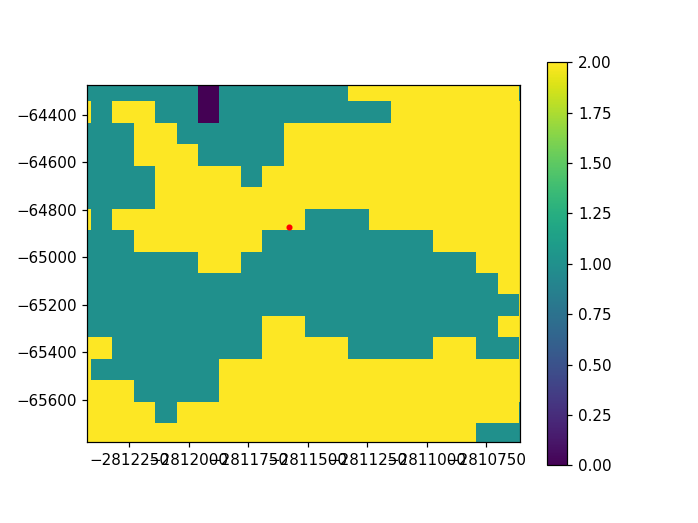

In [13]:
vmem = "/vsimem/tile_%s_%s_%s_%s.tif" % (minX,maxY,maxX, minY)
clipped = rasterio.open(vmem)
band=clipped.read(1)
print(values)
fig, ax = plt.subplots()
show(clipped, transform=clipped.transform, cmap='viridis', ax=ax)
fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=band.min(), vmax=band.max()), cmap=mpl.cm.viridis))
geoDf.plot(ax=ax, marker='.', color='red')

In [28]:
## query results
environmentName = 'DEVv2'
query = DataSetQuery.DataSetQuery('http://localhost:9000',environmentName)
async_query = AsyncDataSetQuery.AsyncDataSetQuery('ws://localhost:9000',environmentName)


# 400000 500000 0 100000 mtngla testdataset HMA RGIv60 SDCv10 DebugRun
parentDsName = 'mtngla'
dataset = 'Ready8'
runName='TestRun8'
region='himalayas'

#Setup the bounding box
bbx = query.getDataSetBoundingBox(parentDsName, dataset, region)
bbx = json.loads(bbx)
minT = datetime.datetime.utcfromtimestamp(bbx['minTime'])
maxT = datetime.datetime.utcfromtimestamp(bbx['maxTime'])

#The overall data cube for the two datasets
#print(query.getDataSetBoundingBox(parentDsName,dataset, region))
projection = json.loads(query.getProjection(parentDsName, region))['proj4']
fp = async_query.executeQuery( parentDsName,dataset,region,minX,maxX,minY,maxY,minT,maxT,[],[])
#df = MalardHelpers.getDataFrameFromNetCDF(fp.resultFileName)
ds = DataSets.PointDataSet(fp.resultFileName, projection)


In [43]:
ds=ds.asGeoDataSet()
ds.data.columns

Index(['index', 'lon', 'lat', 'elev', 'heading', 'demDiff', 'demDiffMad',
       'demDiffMad2', 'phaseAmb', 'meanDiffSpread', 'wf_number', 'sampleNb',
       'power', 'powerdB', 'phase', 'phaseS', 'phaseSSegment',
       'phaseConfidence', 'coh', 'x', 'y', 'time', 'swathFileId',
       'within_Debris', 'within_Tdx', 'refElevation', 'refDifference',
       'geometry'],
      dtype='object')

<IPython.core.display.Javascript object>


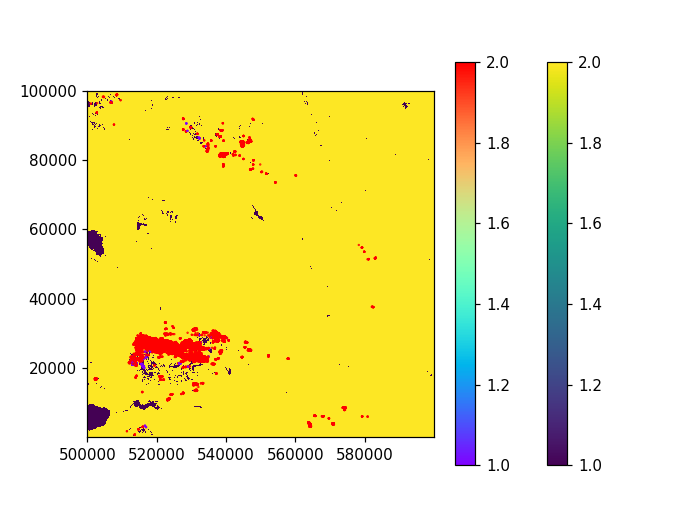

In [51]:
fig, ax = plt.subplots()
show(clipped, transform=clipped.transform, cmap='viridis', ax=ax)
fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=band.min(), vmax=band.max()), cmap=mpl.cm.viridis))
ds.data.plot(ax=ax,column='within_Tdx', marker='.', markersize=1, legend=True, cmap='rainbow')

In [53]:
query.getDataSets('mtngla')

'[{"name":"Ready8","region":"himalayas"},{"name":"Ready7","region":"himalayas"},{"name":"Ready5","region":"himalayas"},{"name":"Ready4","region":"himalayas"},{"name":"Ready1","region":"himalayas"},{"name":"ADwithTDX","region":"alaska"},{"name":"Ready3","region":"himalayas"},{"name":"srtm","region":"himalayas"},{"name":"Ready4-1","region":"himalayas"},{"name":"testdataset4","region":"himalayas"},{"name":"tdxtest1","region":"himalayas"},{"name":"tdx2","region":"himalayas"},{"name":"tdx","region":"himalayas"},{"name":"publishtest","region":"himalayas"},{"name":"Ready2","region":"himalayas"}]'